## Post Sentiment Classification Task

In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

In [ ]:
# Your code here
#import
import sys
import spacy
import itertools
# Load the small english model.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
  eval = []
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  eval.append(precision)
  recall = recall_score(predictions, true_labels, average='macro')
  eval.append(recall)
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1,average='macro') #1 means f_1 measure

  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3, zero_division = 0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted

In [ ]:
#process the data
#reset the index
train_data.reset_index(drop=True, inplace=True)
validation_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [ ]:
train_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7f317,https://www.reddit.com/r/relationships/comment...,Melodrama_,"It's a sad realization, isn't it?",,False,2,t1_cy7erc5,negative,1.000000
1,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hlyf,https://www.reddit.com/r/relationships/comment...,Melodrama_,I told her a couple of minutes ago that I didn...,elaboration,False,2,t1_cy7erc5,neutral,0.483631
2,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7etrr,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Leeches don't make good friends.,answer,False,1,t3_3xshx9,positive,0.600000
3,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hhpq,https://www.reddit.com/r/relationships/comment...,Melodrama_,I just ended it. Apparently she wasn't a good ...,elaboration,False,2,t1_cy7etrr,positive,0.475000
4,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7q0qg,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Good for you! Make sure you stick with it.,appreciation,False,3,t1_cy7hhpq,positive,0.744444
...,...,...,...,...,...,...,...,...,...,...,...,...
12133,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpyd0,https://www.reddit.com/r/reddit.com/comments/h...,,"If you were God, you'd know whether we would b...",answer,False,1,t3_hzu51,neutral,0.000000
12134,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpz7m,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,If I check my account balance in 5 minutes and...,answer,False,1,t3_hzu51,neutral,0.000000
12135,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq0tl,https://www.reddit.com/r/reddit.com/comments/h...,alllie,I don't know. Can you heal the sick with a tou...,answer,False,1,t3_hzu51,negative,0.637202
12136,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq19j,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,... Give LeBron James a championship ring?,humor,False,2,t1_c1zq0tl,neutral,0.000000


In [ ]:
#replace labels
def create_label(x):
    if x == 'neutral':
      return 2
    elif x == 'positive':
      return 3
    elif x == 'negative':
      return 1
    elif x == 'very positive':
      return 4
    elif x == 'very negative':
      return 0 

labels = []
temp = train_data['sentiment.polarity']
for i in range(12138):
  labels.append(create_label(temp[i]))
train_data.insert(12,'labels',labels)


labels = []
temp = validation_data['sentiment.polarity']
for i in range(3109):
  labels.append(create_label(temp[i]))
validation_data.insert(12,'labels',labels)

labels = []
temp = test_data['sentiment.polarity']
for i in range(4016):
  labels.append(create_label(temp[i]))
test_data.insert(12,'labels',labels)

In [ ]:
#data is imbalance
validation_labels = validation_data['labels']
validation_labels_counts = validation_labels.value_counts()
print (validation_labels_counts.head())

train_labels = train_data['labels']
train_labels_counts = train_labels.value_counts()
print (train_labels_counts.head())

test_labels = test_data['labels']
test_labels_counts = test_labels.value_counts()
print (test_labels_counts.head())

2    1961
3     845
1     215
4      73
0      15
Name: labels, dtype: int64
2    7679
3    3231
1     878
4     253
0      97
Name: labels, dtype: int64
2    2514
3    1102
1     282
4      86
0      32
Name: labels, dtype: int64


In [ ]:
#Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#Normalize
def normalize(tokens):
  normalized = list()
  for token in tokens:
    #check letter
    if (token.is_alpha):
      lemma = token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_
      normalized.append(lemma)
  return normalized

#Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

In [ ]:
#one hot encoding
one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize, binary=True)
train_features = one_hot_vectorizer.fit_transform(train_data['body'])
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

In [ ]:
print(validation_features)

  (0, 489)	1
  (0, 735)	1
  (0, 1134)	1
  (0, 1187)	1
  (0, 1418)	1
  (0, 2704)	1
  (0, 4272)	1
  (0, 5007)	1
  (0, 5920)	1
  (0, 5970)	1
  (0, 6931)	1
  (0, 8644)	1
  (0, 9143)	1
  (0, 9146)	1
  (0, 12830)	1
  (0, 13387)	1
  (0, 13451)	1
  (1, 429)	1
  (1, 489)	1
  (1, 681)	1
  (1, 1187)	1
  (1, 1234)	1
  (1, 1992)	1
  (1, 2756)	1
  (1, 3709)	1
  :	:
  (3108, 489)	1
  (3108, 565)	1
  (3108, 1187)	1
  (3108, 1719)	1
  (3108, 1885)	1
  (3108, 4725)	1
  (3108, 5920)	1
  (3108, 6324)	1
  (3108, 6485)	1
  (3108, 6910)	1
  (3108, 7353)	1
  (3108, 9014)	1
  (3108, 9212)	1
  (3108, 9331)	1
  (3108, 9960)	1
  (3108, 10121)	1
  (3108, 11596)	1
  (3108, 11731)	1
  (3108, 12867)	1
  (3108, 13381)	1
  (3108, 13387)	1
  (3108, 13585)	1
  (3108, 13854)	1
  (3108, 14449)	1
  (3108, 15110)	1


In [ ]:
#rf-idf default settings
#raw_tfidf = TfidfVectorizer(sublinear_tf = True,ngram_range=(1,1), max_features = 5000,max_df=0.4)
#raw_tfidf = TfidfVectorizer(sublinear_tf = True, ngram_range=(1,1), max_features = 5000, max_df=0.9)
raw_tfidf = TfidfVectorizer(sublinear_tf = True, max_features = 8000, max_df=0.8)
train_tfidf = raw_tfidf.fit_transform(train_data['body'])
test_tfidf = raw_tfidf.transform(test_data['body'])
validation_tfidf = raw_tfidf.transform(validation_data['body'])

In [ ]:
#dummy_prior for the data
dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels)
print(dummy_prior.score(test_features, test_labels))
evaluation_summary("Dummy Prior", dummy_prior.predict(test_features), test_labels)

evaluation_summary("Dummy Prior", dummy_prior.predict(train_features), train_labels)

dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(train_features, train_labels)
print(dummy_mf.score(test_features, test_labels))
evaluation_summary("Dummy Majority", dummy_mf.predict(test_features), test_labels)
evaluation_summary("Dummy Majority", dummy_mf.predict(train_features), train_labels)

0.4865537848605578
Evaluation for: Dummy Prior
Classifier 'Dummy Prior' has Acc=0.478 P=0.203 R=0.203 F1=0.203
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        36
           1      0.096     0.094     0.095       286
           2      0.630     0.630     0.630      2516
           3      0.279     0.278     0.278      1103
           4      0.012     0.013     0.012        75

    accuracy                          0.478      4016
   macro avg      0.203     0.203     0.203      4016
weighted avg      0.478     0.478     0.478      4016


Confusion matrix:
 [[   0    3   19    9    1]
 [   2   27  169   78    6]
 [  24  178 1584  682   46]
 [   9   76  689  307   21]
 [   1    2   55   27    1]]
Evaluation for: Dummy Prior
Classifier 'Dummy Prior' has Acc=0.471 P=0.202 R=0.202 F1=0.202
              precision    recall  f1-score   support

           0      0.031     0.030     0.030       100
           1      0.067     0.066     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#mutiple logistic regression
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(solver='saga', max_iter = 1000,multi_class='ovr')
#lr_model = lr.fit(train_features, train_labels)
#lr_model.predict(test_features)
#evaluation_summary("LR onehot", lr_model.predict(test_features), test_labels)
#evaluation_summary("LR onehot", lr_model.predict(train_features), train_labels)
#mutiple logistic regression with tf-idf
#lr = LogisticRegression(solver='saga',max_iter = 10, penalty = 'l2', C = 50)
#lr = LogisticRegression(solver='saga',max_iter = 50, penalty = 'l1', C = 10)
lr = LogisticRegression(solver='saga',penalty = 'l1',C = 4, max_iter = 100)
lr_model = lr.fit(train_tfidf, train_labels)
lr_model.predict(validation_tfidf)
evaluation_summary("LR onehot", lr_model.predict(validation_tfidf), validation_labels)
evaluation_summary("LR onehot", lr_model.predict(train_tfidf), train_labels)
evaluation_summary("LR onehot", lr_model.predict(test_tfidf), test_labels)

Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.787 P=0.524 R=0.654 F1=0.572
              precision    recall  f1-score   support

           0      0.267     0.400     0.320        10
           1      0.447     0.627     0.522       153
           2      0.894     0.813     0.852      2157
           3      0.672     0.755     0.711       752
           4      0.342     0.676     0.455        37

    accuracy                          0.787      3109
   macro avg      0.524     0.654     0.572      3109
weighted avg      0.810     0.787     0.795      3109


Confusion matrix:
 [[   4    2    9    0    0]
 [   1   96  113    5    0]
 [   5   51 1754  145    6]
 [   0    4  267  568    6]
 [   0    0   14   34   25]]
Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.933 P=0.802 R=0.938 F1=0.860
              precision    recall  f1-score   support

           0      0.629     0.924     0.748        66
           1      0.764     0.950     0.847       706
           

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
#logistic regression modift
#lor = LogisticRegression(penalty='l1',C=100,multi_class='ovr') 
lr = LogisticRegression(multi_class='ovr',solver='saga')
lr_model = lr.fit(train_features, train_labels)
lr_model.predict(validation_features)
evaluation_summary("LR onehot", lr_model.predict(validation_features), validation_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.722 P=0.354 R=0.635 F1=0.392
              precision    recall  f1-score   support

           0      0.067     0.500     0.118         2
           1      0.158     0.548     0.245        62
           2      0.886     0.749     0.812      2319
           3      0.550     0.650     0.596       715
           4      0.110     0.727     0.190        11

    accuracy                          0.722      3109
   macro avg      0.354     0.635     0.392      3109
weighted avg      0.791     0.722     0.748      3109


Confusion matrix:
 [[   1    2   10    2    0]
 [   0   34  175    6    0]
 [   1   22 1737  198    3]
 [   0    4  376  465    0]
 [   0    0   21   44    8]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
#decision tree
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=30)
tree_model = tree.fit(train_features, train_labels)
tree_model.predict(train_features)
evaluation_summary("DT onehot", tree_model.predict(train_features), train_labels)
tree_model.predict(test_features)
evaluation_summary("DT onehot", tree_model.predict(test_features), test_labels)

Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.884 P=0.701 R=0.949 F1=0.791
              precision    recall  f1-score   support

           0      0.515     1.000     0.680        50
           1      0.551     0.927     0.691       522
           2      0.988     0.853     0.915      8900
           3      0.751     0.975     0.849      2487
           4      0.700     0.989     0.819       179

    accuracy                          0.884     12138
   macro avg      0.701     0.949     0.791     12138
weighted avg      0.915     0.884     0.890     12138


Confusion matrix:
 [[  50    0   47    0    0]
 [   0  484  390    3    1]
 [   0   36 7589   54    0]
 [   0    2  802 2426    1]
 [   0    0   72    4  177]]
Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.676 P=0.400 R=0.469 F1=0.425
              precision    recall  f1-score   support

           0      0.250     0.333     0.286        24
           1      0.294     0.474     0.363       175
           

In [ ]:
#svc
from sklearn import svm
#clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(decision_function_shape='ovr')
clf_model = clf.fit(train_features, train_labels)
clf_model.predict(test_features)
evaluation_summary("SVM onehot", clf_model.predict(test_features), test_labels)
evaluation_summary("SVM onehot", clf_model.predict(train_features), train_labels)

Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.722 P=0.293 R=0.405 F1=0.295
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.039     0.579     0.073        19
           2      0.934     0.723     0.815      3245
           3      0.493     0.722     0.586       752
           4      0.000     0.000     0.000         0

    accuracy                          0.722      4016
   macro avg      0.293     0.405     0.295      4016
weighted avg      0.847     0.722     0.769      4016


Confusion matrix:
 [[   0    4   26    2    0]
 [   0   11  264    7    0]
 [   0    3 2347  164    0]
 [   0    1  558  543    0]
 [   0    0   50   36    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.855 P=0.418 R=0.740 F1=0.444
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.281     0.972     0.436       254
           2      0.976     0.841     0.903      8916
           3      0.815     0.888     0.850      2964
           4      0.016     1.000     0.031         4

    accuracy                          0.855     12138
   macro avg      0.418     0.740     0.444     12138
weighted avg      0.922     0.855     0.880     12138


Confusion matrix:
 [[   0    5   89    3    0]
 [   0  247  616   15    0]
 [   0    2 7495  182    0]
 [   0    0  599 2632    0]
 [   0    0  117  132    4]]


In [ ]:
#tabel for result
data=np.random.randn(6,4)#创建一个6行4列的数组
Accuracy and weighted average precision / recall / F1
df=pd.DataFrame(data,columns=['Dummy1','Dummy2','LogisticRegression1','LogisticRegression2','SVC Classifier','decision tree'],index=['accuracy','precision','recall','f1'])

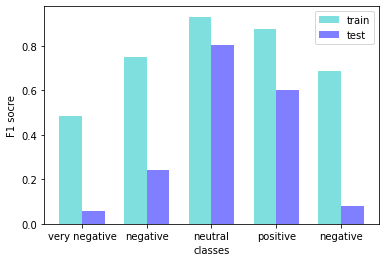

In [ ]:
#f1 bar chart
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

train = [0.484,0.751,0.930,0.875,0.687]
test = [0.059,0.242,0.804,0.602,0.081]
x = np.arange(5)
bar_width = 0.35
tick_label = ["very negative", "negative", "neutral", "positive", "negative"]

plt.bar(x, train, bar_width, align="center", color="c", label="train", alpha=0.5)
plt.bar(x+bar_width, test, bar_width, color="b", align="center", label="test", alpha=0.5)

plt.xlabel("classes")
plt.ylabel("F1 socre")

plt.xticks(x+bar_width/2, tick_label)

plt.legend()

plt.show()

In [ ]:
#using pipline to tune the data
from sklearn.pipeline import Pipeline

prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='reviewText')),
              ('one-hot', CountVectorizer(binary=True)),
              ('logreg', LogisticRegression(solver='saga', max_iter=9000))
              ])
prediction_pipeline.fit(train_data, train_labels)
evaluation_summary("LR", prediction_pipeline.predict(validation_data), validation_labels) 

from sklearn.model_selection import GridSearchCV
params = {
   'one-hot__binary': (True, False), 
}
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_data, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [ ]:
#adding feature
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from text and summary
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', TfidfVectorizer(sublinear_tf = True, max_features = 8000, max_df=0.8)), 
              ])),
            ('summary1', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', TfidfVectorizer(sublinear_tf = True, max_features = 8000)), 
              ])),
            ('summary2', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('one-hot', TfidfVectorizer(sublinear_tf = True, max_features = 8000)), 
              ]))
        ])
        )
    ])

one_hot_train_features = prediction_pipeline.fit_transform(train_data)
one_hot_validation_features = prediction_pipeline.transform(validation_data)
one_hot_test_features = prediction_pipeline.transform(test_data)

lr = LogisticRegression(solver='saga',penalty = 'l1',C = 4)
combined_model = lr.fit(one_hot_train_features,train_labels)
evaluation_summary("LR TFIDF", combined_model.predict(one_hot_test_features), test_labels)
evaluation_summary("LR TFIDF", combined_model.predict(one_hot_train_features), train_labels)
evaluation_summary("LR TFIDF", combined_model.predict(one_hot_validation_features), validation_labels)

Evaluation for: LR TFIDF
Classifier 'LR TFIDF' has Acc=0.783 P=0.492 R=0.679 F1=0.551
              precision    recall  f1-score   support

           0      0.281     0.600     0.383        15
           1      0.273     0.602     0.376       128
           2      0.915     0.797     0.852      2886
           3      0.663     0.776     0.715       942
           4      0.326     0.622     0.427        45

    accuracy                          0.783      4016
   macro avg      0.492     0.679     0.551      4016
weighted avg      0.826     0.783     0.798      4016


Confusion matrix:
 [[   9    6   17    0    0]
 [   3   77  194    8    0]
 [   3   40 2300  167    4]
 [   0    5  353  731   13]
 [   0    0   22   36   28]]
Evaluation for: LR TFIDF
Classifier 'LR TFIDF' has Acc=0.987 P=0.964 R=0.993 F1=0.978
              precision    recall  f1-score   support

           0      0.928     1.000     0.963        90
           1      0.958     0.994     0.976       846
           2   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
